In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("datos.csv")

In [ ]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


In [ ]:
df.describe

<bound method NDFrame.describe of       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  ExterQual  \
0        8450            7            5         19            19          4   
1        9600            6            8         46            46          3   
2       11250            7            5         21            20          4   
3        9550            7            5        107            52          3   
4       14260            8            5         22            22          4   
...       ...          ...          ...        ...           ...        ...   
1455     7917            6            5         23            22          3   
1456    13175            6            6         44            34          3   
1457     9042            7            9         81            16          5   
1458     9717            5            6         72            26          3   
1459     9937            5            6         57            57          4   

      ExterCond  

In [ ]:
df = df[["LotArea","OverallQual","YearBuilt","YearRemodAdd","BedroomAbvGr","GarageCars","SalePrice","Artery"]]

In [ ]:
df.describe

<bound method NDFrame.describe of       LotArea  OverallQual  YearBuilt  YearRemodAdd  BedroomAbvGr  GarageCars  \
0        8450            7         19            19             3           2   
1        9600            6         46            46             3           2   
2       11250            7         21            20             3           2   
3        9550            7        107            52             3           3   
4       14260            8         22            22             4           3   
...       ...          ...        ...           ...           ...         ...   
1455     7917            6         23            22             3           2   
1456    13175            6         44            34             3           2   
1457     9042            7         81            16             4           1   
1458     9717            5         72            26             2           1   
1459     9937            5         57            57             3          

In [ ]:
df["LotArea"].value_counts(dropna=False)

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [ ]:
q1=df["LotArea"].quantile(.25)

In [ ]:
q3=df["LotArea"].quantile(.75)

In [ ]:
IQR=q3-q1

In [ ]:
liminf=q1-IQR*1.5

In [ ]:
limsup=q3+IQR*1.5

In [ ]:
df=df[(df["LotArea"]>=liminf)&(df["LotArea"]<=limsup)]

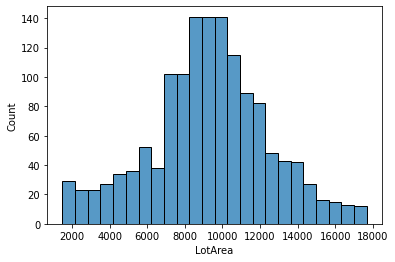

In [ ]:
sns.histplot(x=df['LotArea'])

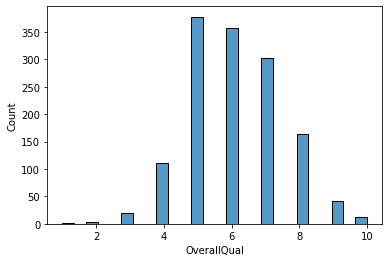

In [ ]:
sns.histplot(x=df['OverallQual'])

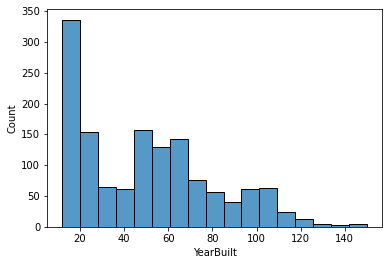

In [ ]:
sns.histplot(x=df['YearBuilt'])

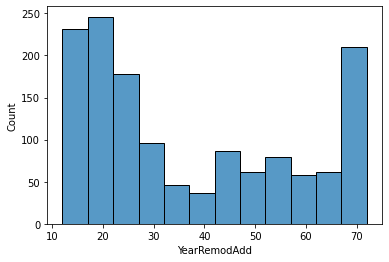

In [ ]:
sns.histplot(x=df['YearRemodAdd'])

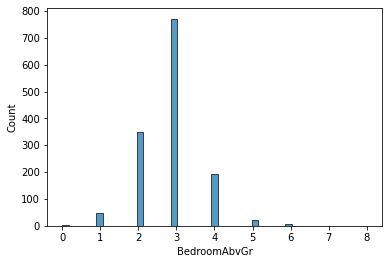

In [ ]:
sns.histplot(x=df['BedroomAbvGr'])

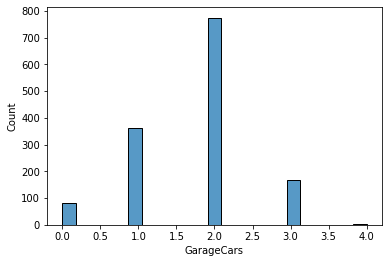

In [ ]:
sns.histplot(x=df['GarageCars'])

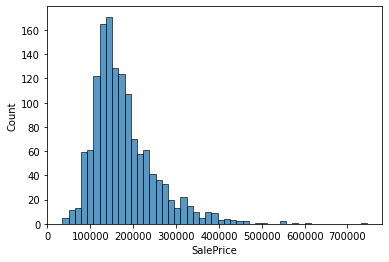

In [ ]:
sns.histplot(x=df['SalePrice'])

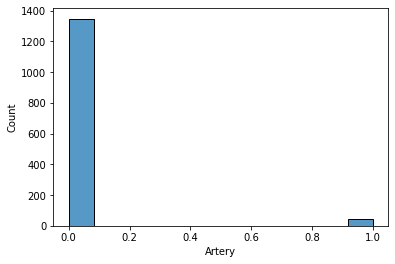

In [ ]:
sns.histplot(x=df['Artery'])

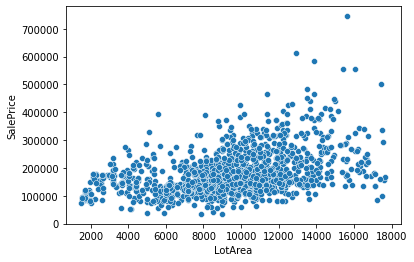

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['LotArea'])


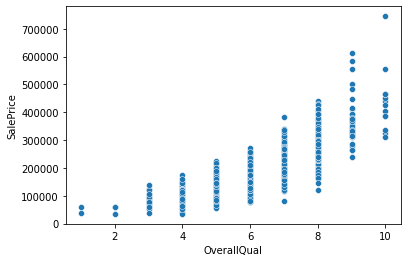

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['OverallQual'])

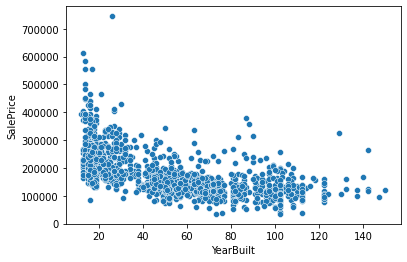

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['YearBuilt'])

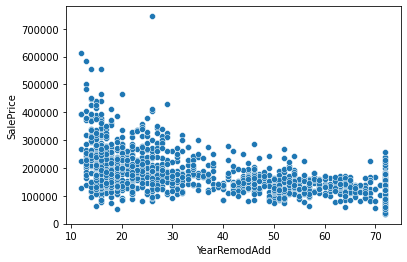

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['YearRemodAdd'])

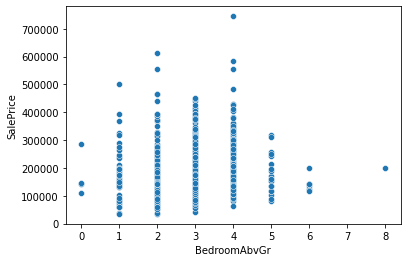

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['BedroomAbvGr'])

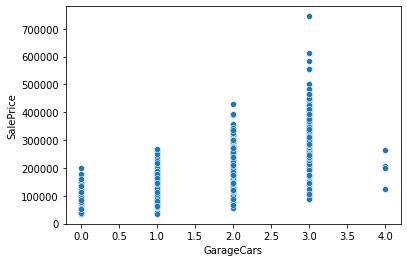

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['GarageCars'])

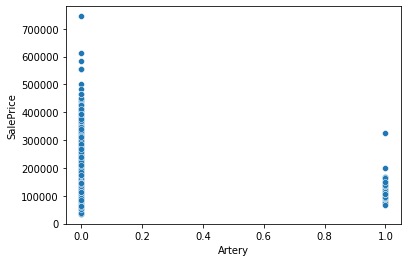

In [ ]:
sns.scatterplot(y=df['SalePrice'],x=df['Artery'])

In [ ]:
x=df.copy()
y=x.pop('SalePrice')
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     585.3
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:20:12   Log-Likelihood:                -16645.
No. Observations:                1391   AIC:                         3.331e+04
Df Residuals:                    1383   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -7.7e+04   8328.224     -9.246      0.000   -9.33e+04   -6.07e+04
LotArea          5.2349      0.354     14.804      0.000       4.541       5.929
OverallQual   3.091e+04   1076.279     28.716      0.000    2.88e+04     3.3e+04
YearBuilt     -134.4981     49.127     -2.738      0.006    -230.870     -38.126
YearRemodAdd  -350.9524     65.661     -5.345      0.000    -479.758    -222.147
BedroomAbvGr  3067.9682   1351.393      2.270      0.023     416.966    5718.970
GarageCars    1.703e+04   1874.191      9.085      0.000    1.34e+04    2.07e+04
Artery       -1.441e+04   6037.024     -2.387      0.017   -2.63e+04   -2567.996
==============================================================================
Omnibus:                      703.908   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10454.810
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                      15.830   Cond. No.                     8.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg.params["Artery"]

-14410.709552406324

#Si las personas viven cerca de la arteria el precio de la vivienda cae en 14410 dolares, ya que el foco de contaminacion esta cerca y hace que el precio baje

In [ ]:
x=df.copy()
y=np.log(x.pop('SalePrice'))
x=sm.add_constant(x)
model=sm.OLS(y,x)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     839.3
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:23:11   Log-Likelihood:                 476.98
No. Observations:                1391   AIC:                            -938.0
Df Residuals:                    1383   BIC:                            -896.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.7504      0.038    286.103      0.000      10.677      10.824
LotArea       2.484e-05    1.6e-06     15.572      0.000    2.17e-05     2.8e-05
OverallQual      0.1486      0.005     30.592      0.000       0.139       0.158
YearBuilt       -0.0014      0.000     -6.179      0.000      -0.002      -0.001
YearRemodAdd    -0.0026      0.000     -8.707      0.000      -0.003      -0.002
BedroomAbvGr     0.0442      0.006      7.248      0.000       0.032       0.056
GarageCars       0.0954      0.008     11.281      0.000       0.079       0.112
Artery          -0.0891      0.027     -3.273      0.001      -0.143      -0.036
==============================================================================
Omnibus:                      132.259   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.699
Skew:                          -0.470   Prob(JB):                     2.95e-89
Kurtosis:                       5.480   Cond. No.                     8.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg.params["Artery"]

-0.08914733835648139

Si las personas viven en la arteria el precio disminuye un 8.91% 